<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет, работа выполнена хорошо! Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Успехов в дальнейшем пути :)

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Дарина! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделала большую работу над проектом. Он выполнен уже на достойном уровне. Если ты, надеюсь, не против, я буду на ты. Если обращение на ты неприемлемо, то прошу сообщить. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках:
    
<div class="alert alert-success">Успех: Если фон комментария зелёный - всё сделано правильно. Рекомендации укажу таким же цветом;</div>
        
<div class="alert alert-warning">Совет: Оранжевый - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки;</div>
        
<div class="alert alert-danger">Ошибка: Красный - нужно переделать. </div>
        
Не удаляй эти комментарии, свои же комментарии ты можешь обозначать любым заметным способом. 

</div>

<div class="alert alert-info" style="background:#E6E6FA;color:#483D8B">
<font size="5"><b>Комментарий студента</b></font>

Привет! Спасибо за ревью, приняла во внимание совет, что необходимо перезапускать ноутбук перед отправкой. Так же спасибо за оставленную ссылку, буду изучать)
    
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-длительности-звонков" data-toc-modified-id="Исследование-длительности-звонков-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование длительности звонков</a></span></li><li><span><a href="#Исследование-количества-сообщений" data-toc-modified-id="Исследование-количества-сообщений-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование количества сообщений</a></span></li><li><span><a href="#Исследование-интернет-трафика" data-toc-modified-id="Исследование-интернет-трафика-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование интернет-трафика</a></span></li><li><span><a href="#Подготовка-массива-данных-для-дальнейшего-исследования" data-toc-modified-id="Подготовка-массива-данных-для-дальнейшего-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка массива данных для дальнейшего исследования</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

**Цель**: Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание данных**:

Таблица `users` - информация о пользователях;

Таблица `calls` - информация о звонках;

Таблица `messages` - информация о сообщениях;

Таблица `internet` - информация об интернет-сессиях;

Таблица `tariffs` - информация о тарифах.

**Описание тарифов**:

* Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

* Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание**: 
* «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. 

</div>

In [1]:
# Выгрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [2]:
# Выгрузка массивов данных
df_calls = pd.read_csv('/datasets/calls.csv', parse_dates=['call_date']).copy()
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0, parse_dates=['session_date']).copy()
df_messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv', parse_dates=['churn_date', 'reg_date'])

# Подготовка данных

In [3]:
# Изучим информацию о пользователях
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>

Успех: Здорово, что ты освоила способ устранения проблем с типом дат в данных уже на стадии их считывания. 

</div>

In [5]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [6]:
df_users.duplicated().sum()

0

В данных не оказалось дубликатов и пропусков, кроме как в колонке с датой прекращения пользования тарифов - там всего 38 непропущенных значений. Это означает, что только 38 пользователей завершили использование тарифа на момент выгрузки данных.

In [7]:
# Изучим информацию о звонках
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [9]:
df_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [10]:
df_calls.duplicated().sum()

0

Пропусков и явных дубликатов в данных нет, однако есть звонки с нулевой длительностью. Таким образом обозначены пропущенные звонки, поэтому их удалять не будем. Посмотрим, какую часть они занимают.

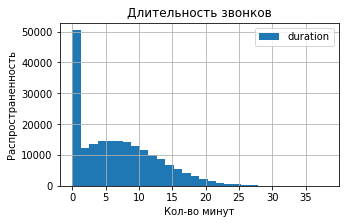

In [11]:
df_calls.plot(y='duration', kind='hist', bins = 30, grid=True,
             title='Длительность звонков', figsize=(5,3))
plt.xlabel('Кол-во минут')
plt.ylabel('Распространенность')
plt.show()

In [12]:
print('Количество звонков с нулевой продолжительностью:',
      len(df_calls[df_calls['duration'] == 0]))
print('Процент таких звонков от общего количества: {:.2%}'
      .format(len(df_calls[df_calls['duration'] == 0]) / len(df_calls)))

Количество звонков с нулевой продолжительностью: 39613
Процент таких звонков от общего количества: 19.55%


Для удобства дальнейших исследований можем привести длительность звонков к целому типу, при этом округляя вверх, так как по условию секунды всегда округляются до минут оператором.

In [13]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

</div>

In [14]:
# Изучим информацию о сообщениях
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [16]:
df_messages.duplicated().sum()

0

Пропущенных значений и явных дубликатов в таблице с информацией о сообщениях не обнаружено.

In [17]:
# Изучим информацию об интернет-сессиях
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [18]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [19]:
df_internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [20]:
df_internet.duplicated().sum()

0

Пропусков и явных дубликатов в данных нет, однако есть интернет-сессии с нулевым количеством потраченного трафика. Скорее всего, так обозначены пользователи, которые не пользуются интернетом в целом. Посмотрим, какую часть они составляют.

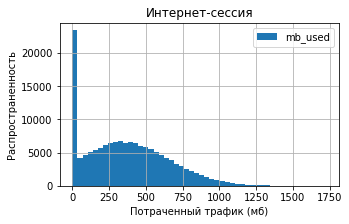

In [21]:
df_internet.plot(y='mb_used', kind='hist', bins=50, grid=True,
             title='Интернет-сессия', figsize=(5,3))
plt.xlabel('Потраченный трафик (мб)')
plt.ylabel('Распространенность')
plt.show()

In [22]:
print('Количество интернет-сессий без потраченного трафика:',
      len(df_internet[df_internet['mb_used'] == 0]))
print('Процент таких интернет-сессий от общего количества: {:.2%}'
      .format(len(df_internet[df_internet['mb_used'] == 0]) / len(df_internet)))

Количество интернет-сессий без потраченного трафика: 19598
Процент таких интернет-сессий от общего количества: 13.12%


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>

Успех: Верное решение!

</div>

In [23]:
# Изучим информацию о тарифах
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [25]:
df_tariffs['gb_per_month_included'] = np.ceil(df_tariffs['mb_per_month_included'] / 1024)

В таблице с тарифами всего две строки, с данными и их типами всё в порядке.

# Обработка пропущенных значений

**Информация о пользователях:**

In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В колонке `churn_date` таблицы `users` обнаружено 462 пропуска из 500, но так как этот столбец содержит информацию о дате прекращения использования услуг, то эти пропущенные значения означают, что пользователь все еще пользуется тарифом. Следовательно, изменять эти пропуски не требуется.

**Информация о звонках:**

In [27]:
df_calls['duration'].value_counts().head()

0    39613
7    11510
6    11457
5    11411
8    11272
Name: duration, dtype: int64

В колонке `duration` таблицы `calls` обнаружено 39613 нулевых значений, что составляет 19.55% от общего количества. Возможная причина их появления в том, что по умолчанию пропущенные звонки обозначаются нулями, или же имела место ошибка сохранения части данных. 

In [28]:
df_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Выберем ненулевые значения, при этом будем работать не с изначальным массивом, а с его копией, чтобы не потерять исходные данные.

In [29]:
df_calls = df_calls.query('duration != 0').reset_index(drop=True)
df_calls['duration'].describe()

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

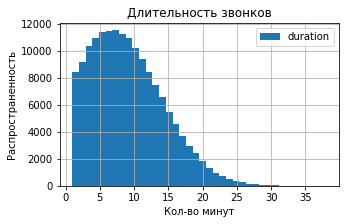

In [30]:
df_calls.plot(y='duration', kind='hist', bins = 38, grid=True,
             title='Длительность звонков', figsize=(5,3))
plt.xlabel('Кол-во минут')
plt.ylabel('Распространенность')
plt.show()

Видим, что выброс исчез и среднее значение с медианой увеличились после удаления нулевых значений.

**Информация об интернет-сессиях:**

In [31]:
df_internet['mb_used'].value_counts().head()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64

В колонке `mb_used` таблицы `internet` обнаружено 19598 нулевых значений, что составляет 13.12% от общего количества. Возможная причина их появления в том, что даже если пользователь подключался к интернету, но не совершал никаких действий, то это расценивалось как сессия. Или же нулями обозначается отсутствие использования интернета в целом.

In [32]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Выберем ненулевые значения, при этом будем работать не с изначальным массивом, а с его копией, чтобы не потерять исходные данные.

In [33]:
df_internet = df_internet.query('mb_used != 0').reset_index(drop=True)
df_internet['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

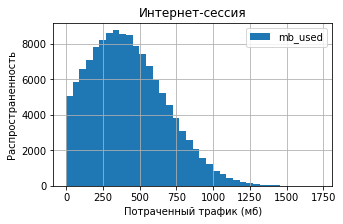

In [34]:
df_internet.plot(y='mb_used', kind='hist', bins=38, grid=True,
             title='Интернет-сессия', figsize=(5,3))
plt.xlabel('Потраченный трафик (мб)')
plt.ylabel('Распространенность')
plt.show()

Видим, что выброс исчез и среднее значение с медианой увеличились после удаления нулевых значений.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>

Успех: Соглашусь с отмеченными причинами появления таких значений. Мы их вполне можем не учитывать в дальнейшем анализе. 

</div>

# Расчеты для каждого пользователя

In [35]:
# Добавим колонки с номером месяца.
df_calls['calls_month'] = df_calls['call_date'].dt.month
df_messages['message_month'] = df_messages['message_date'].dt.month
df_internet['session_month'] = df_internet['session_date'].dt.month

In [36]:
# Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.
df_pivot_calls = df_calls.pivot_table(index=['user_id', 'calls_month'], values='duration',
                                      aggfunc=['count', 'sum']).reset_index()
df_pivot_calls.columns = ['user_id', 'month', 'calls_count', 'duration_sum']
df_pivot_calls.head()

,user_id,month,calls_count,duration_sum
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


In [37]:
# Количество отправленных сообщений по месяцам.
df_pivot_messages = df_messages.pivot_table(index=['user_id', 'message_month'], values='id', 
                                            aggfunc='count').reset_index()
df_pivot_messages.columns = ['user_id', 'month', 'messages_count']
df_pivot_messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [38]:
# Объем израсходованного интернет-трафика по месяцам.
df_pivot_internet = df_internet.pivot_table(index=['user_id', 'session_month'], values='mb_used',
                                            aggfunc='sum').reset_index()
df_pivot_internet.columns = ['user_id', 'month', 'mb_used_sum']
df_pivot_internet['gb_used_sum'] = np.ceil(df_pivot_internet['mb_used_sum'] / 1024)
df_pivot_internet.head()

,user_id,month,mb_used_sum,gb_used_sum
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Помесячные показатели рассчитаны. Данные подготовлены к дальнейшим расчетам. Округление трафика проведено)

</div>

In [39]:
# Для расчета выручки объединим полученные сводные таблицы.
df_pivot_users = df_pivot_calls.merge(df_pivot_messages, on=['user_id', 'month'], how='outer')
df_pivot_users = df_pivot_users.merge(df_pivot_internet, on=['user_id', 'month'], how='outer')
df_pivot_users = df_pivot_users.merge(df_users[['user_id', 'tariff', 'city']], on='user_id', how='outer')
display(df_pivot_users.head())
df_pivot_users.info()

,user_id,month,calls_count,duration_sum,messages_count,mb_used_sum,gb_used_sum,tariff,city
0,1000,5.0,17.0,159.0,22.0,2253.49,3.0,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23233.77,23.0,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,14003.64,14.0,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14055.93,14.0,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14568.91,15.0,ultra,Краснодар


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
user_id           3216 non-null int64
month             3214 non-null float64
calls_count       3168 non-null float64
duration_sum      3168 non-null float64
messages_count    2717 non-null float64
mb_used_sum       3201 non-null float64
gb_used_sum       3201 non-null float64
tariff            3216 non-null object
city              3216 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 251.2+ KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Да, именно внешнее соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

В итоговой таблице пропуски в колонках `calls_count`, `duration_sum`, `messages_count`, `mb_used_sum`, `gb_used_sum` и `month`.
Для столбцов `calls_count` и `duration_sum` одинаковое количество пропущенных значений - `48`, это скорее всего связано с тем, что эти клиенты не пользовались звонками, что и объясняет равное количество пропусков.

То же самое и для столбцов `mb_used_sum` и `gb_used_sum` - в них по `15` пропущенных значений. Это значит, что 15 пользователей не использовали интернет.

В колонке `messages_count` уже больше пропусков, - `499`, что может быть связано с возросшей популярностью мессенджеров и, как следствие, более редким использованием обычных сообщений. 

Для столбца `month` выявлено `2` пропущенных значения. Это произошло из-за того, что два абонента подключились и отключились в течение одного месяца. 

Удалим упомянутых выше двух клиентов и заполним пропуски нулями, руководствуясь тем, что пользователи не совершали никаких действий в конкретный период.

In [40]:
df_pivot_users.dropna(subset=['month'], inplace=True)
df_pivot_users.fillna(0, inplace=True)
df_pivot_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id           3214 non-null int64
month             3214 non-null float64
calls_count       3214 non-null float64
duration_sum      3214 non-null float64
messages_count    3214 non-null float64
mb_used_sum       3214 non-null float64
gb_used_sum       3214 non-null float64
tariff            3214 non-null object
city              3214 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 251.1+ KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>

Успех: Да, не все пользователи используют полный спектр услуг оператора. Пропуски следует заполнить нулями.  

</div>

In [41]:
# Функция для расчета помесячной выручки с каждого пользователя.
def revenue_month(row):
    revenue = 0
    calls_sum = row['duration_sum']
    messages_count = row['messages_count']
    gb_used_sum = row['gb_used_sum']
    tariff = row['tariff']
    
    difference_calls_sum = calls_sum - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'])
    difference_messages_count = messages_count - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'])
    difference_gb_used_sum = gb_used_sum - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['gb_per_month_included'])
    
    revenue += int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'])
    if difference_calls_sum > 0:
        revenue += difference_calls_sum * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'])
    if difference_messages_count > 0:
        revenue += difference_messages_count * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'])
    if difference_gb_used_sum > 0:
        revenue += difference_gb_used_sum * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'])
    
    return revenue

In [42]:
# Рассчитаем помесячную выручку с каждого пользователя.
df_pivot_users['month_revenue'] = df_pivot_users.apply(revenue_month, axis=1)
df_pivot_users.sample(n=5, random_state=5)

,user_id,month,calls_count,duration_sum,messages_count,mb_used_sum,gb_used_sum,tariff,city,month_revenue
3165,1497,10.0,50.0,490.0,20.0,11500.29,12.0,smart,Челябинск,550.0
426,1066,11.0,79.0,685.0,49.0,17636.32,18.0,smart,Астрахань,1705.0
329,1053,11.0,79.0,783.0,0.0,14682.17,15.0,ultra,Ростов-на-Дону,1950.0
232,1036,8.0,60.0,554.0,3.0,16831.79,17.0,smart,Санкт-Петербург,1112.0
1525,1244,9.0,40.0,338.0,82.0,21968.95,22.0,smart,Москва,2046.0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Финальная таблица получена верным образом. Здорово, что она не содержит излишней информации в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит.

</div>

# Анализ данных

## Исследование длительности звонков

Опишем поведение клиентов оператора, исходя из выборки и узнаем, сколько минут разговора требуется пользователям каждого тарифа в месяц. Найдём среднее количество, дисперсию и стандартное отклонение, построим гистограммы.

In [43]:
print('Средняя длительность звонков пользователей тарифа "Ультра" в месяц:',
      df_pivot_users.query('tariff == "ultra"')['duration_sum'].mean())
print('Средняя длительность звонков пользователей тарифа "Смарт" в месяц:',
      df_pivot_users.query('tariff == "smart"')['duration_sum'].mean())

Средняя длительность звонков пользователей тарифа "Ультра" в месяц: 526.6233502538071
Средняя длительность звонков пользователей тарифа "Смарт" в месяц: 417.9349484073576


**Гистограммы средней длительности звонков**

Сравнение средней длительности разговора в тарифах:

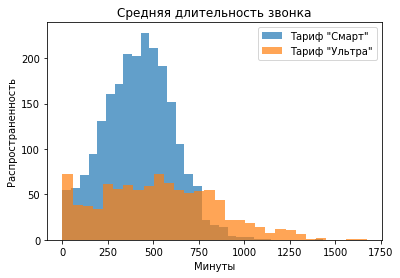

In [44]:
df_pivot_users.query('tariff == "smart"')['duration_sum'].plot(kind='hist', bins=30, alpha=0.7, label='Тариф "Смарт"')
df_pivot_users.query('tariff == "ultra"')['duration_sum'].plot(kind='hist', bins=30, alpha=0.7, label='Тариф "Ультра"')
plt.title('Средняя длительность звонка')
plt.xlabel('Минуты')
plt.ylabel('Распространенность')
plt.legend()
plt.show()

Диаграммы размаха средней длительности разговора в тарифах:

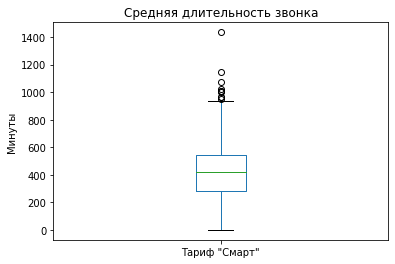

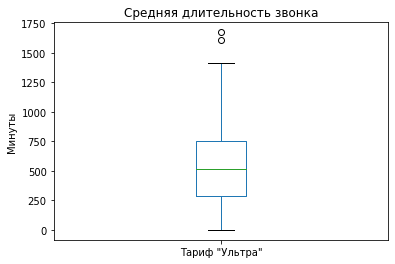

In [45]:
df_pivot_users.query('tariff == "smart"')['duration_sum'].plot(kind='box', label='Тариф "Смарт"')
plt.title('Средняя длительность звонка')
plt.ylabel('Минуты')
plt.show()

df_pivot_users.query('tariff == "ultra"')['duration_sum'].plot(kind='box', label='Тариф "Ультра"')
plt.title('Средняя длительность звонка')
plt.ylabel('Минуты')
plt.show()

**Вывод**

* Распределение средней продолжительности звонков у пользователей тарифа "Смарт" близко к нормальному
* Средняя продолжительность звонков у пользователей тарифа "Ультра" выше, чем у пользователей тарифа "Смарт"
* Максимальная продолжительность звонка выше у тарифа "Ультра№, она составляет `1673 мин.`, когда как у тарифа "Смарт" - `1435 мин.`

**Стандартное отклонение длительности звонков**

In [46]:
print('Стандартное отклонение длительности звонков пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['duration_sum'].std()))
print('Стандартное отклонение длительности звонков пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['duration_sum'].std()))

Стандартное отклонение длительности звонков пользователей тарифа "Ультра" в месяц: 317.61
Стандартное отклонение длительности звонков пользователей тарифа "Смарт" в месяц: 190.31


**Вывод**

Стандартное отклонение для пользователей тарифа "Ультра" выше, чем для пользователей тарифа "Смарт". Значит, количество минут, которое используют пользователи первого тарифа, имеет менее стабильное значение и может сильно отличаться в каждом месяце от предыдущего. 

**Дисперсия длительности звонков**

In [47]:
print('Стандартное отклонение длительности звонков пользователей тарифа "Ультра" в месяц:',
      df_pivot_users.query('tariff == "ultra"')['duration_sum'].var())
print('Стандартное отклонение длительности звонков пользователей тарифа "Смарт" в месяц:',
      df_pivot_users.query('tariff == "smart"')['duration_sum'].var())

Стандартное отклонение длительности звонков пользователей тарифа "Ультра" в месяц: 100873.63339730098
Стандартное отклонение длительности звонков пользователей тарифа "Смарт" в месяц: 36219.31578434428


**Вывод**

Дисперсия длительности звонков для пользователей тарифа "Ультра" больше, чем для пользователей тарифа "Смарт".

## Исследование количества сообщений

Опишем поведение клиентов оператора, исходя из выборки и узнаем, сколько сообщений требуется пользователям каждого тарифа в месяц. Найдём среднее количество, дисперсию и стандартное отклонение, построим гистограммы.

In [48]:
print('Среднее количество сообщений пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['messages_count'].mean()))
print('Среднее количество сообщений пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['messages_count'].mean()))

Среднее количество сообщений пользователей тарифа "Ультра" в месяц: 49.36
Среднее количество сообщений пользователей тарифа "Смарт" в месяц: 33.38


**Гистограммы среднего количества сообщений**

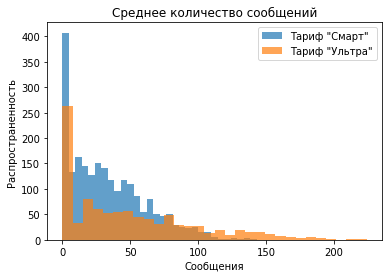

In [49]:
df_pivot_users.query('tariff == "smart"')['messages_count'].plot(kind='hist', bins=30, alpha=0.7, label='Тариф "Смарт"')
df_pivot_users.query('tariff == "ultra"')['messages_count'].plot(kind='hist', bins=30, alpha=0.7, label='Тариф "Ультра"')
plt.title('Среднее количество сообщений')
plt.xlabel('Сообщения')
plt.ylabel('Распространенность')
plt.legend()
plt.show()

Диаграммы размаха среднего количества сообщений в тарифах:

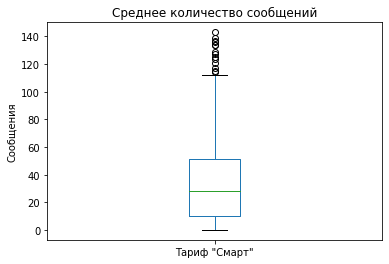

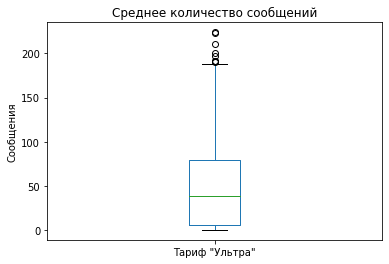

In [50]:
df_pivot_users.query('tariff == "smart"')['messages_count'].plot(kind='box', label='Тариф "Смарт"')
plt.title('Среднее количество сообщений')
plt.ylabel('Cообщения')
plt.show()

df_pivot_users.query('tariff == "ultra"')['messages_count'].plot(kind='box', label='Тариф "Ультра"')
plt.title('Среднее количество сообщений')
plt.ylabel('Сообщения')
plt.show()

**Вывод:**

Среднее количество сообщений у пользователей тарифа "Ультра" больше, чем у пользователей тарифа "Смарт" 

**Стандартное отклонение количества сообщений**

In [51]:
print('Стандартное отклонение количества сообщений пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['messages_count'].std()))
print('Стандартное отклонение количества сообщений пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['messages_count'].std()))

Стандартное отклонение количества сообщений пользователей тарифа "Ультра" в месяц: 47.80
Стандартное отклонение количества сообщений пользователей тарифа "Смарт" в месяц: 28.23


**Вывод**

Стандартное отклонение количества сообщений для пользователей тарифа "Ультра" выше, чем для пользователей тарифа "Смарт". Значит, количество сообщений, которое используют пользователи тарифа "Ультра", имеет менее стабильное значение и может сильно отличаться в каждом месяце от предыдущего. 

**Дисперсия количества сообщений**

In [52]:
print('Дисперсия количества сообщений пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['messages_count'].var()))
print('Дисперсия количества сообщений пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['messages_count'].var()))

Дисперсия количества сообщений пользователей тарифа "Ультра" в месяц: 2285.27
Дисперсия количества сообщений пользователей тарифа "Смарт" в месяц: 796.81


**Вывод**

Дисперсия количества сообщений для пользователей тарифа "Ультра" больше, чем для пользователей тарифа "Смарт".

## Исследование интернет-трафика

Опишем поведение клиентов оператора, исходя из выборки и узнаем, какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Найдём среднее количество, дисперсию и стандартное отклонение, построим гистограммы.

In [53]:
print('Среднее количество потраченного интернет-трафика пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['gb_used_sum'].mean()))
print('Среднее количество потраченного интернет-трафика пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['gb_used_sum'].mean()))

Среднее количество потраченного интернет-трафика пользователей тарифа "Ультра" в месяц: 19.49
Среднее количество потраченного интернет-трафика пользователей тарифа "Смарт" в месяц: 16.33


**Гистограммы среднего объема интернет-трафика**

Сравнение среднего используемого объема интернет-трафика между тарифами:

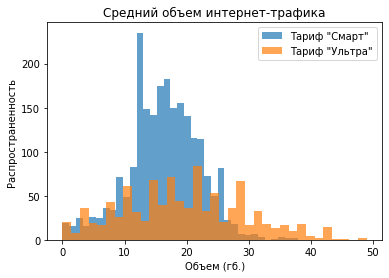

In [54]:
df_pivot_users.query('tariff == "smart"')['gb_used_sum'].plot(kind='hist', bins=35, alpha=0.7, label='Тариф "Смарт"')
df_pivot_users.query('tariff == "ultra"')['gb_used_sum'].plot(kind='hist', bins=35, alpha=0.7, label='Тариф "Ультра"')
plt.title('Средний объем интернет-трафика')
plt.xlabel('Объем (гб.)')
plt.ylabel('Распространенность')
plt.legend()
plt.show()

Диаграммы размаха среднего объема потраченного интернет-трафика в тарифах:

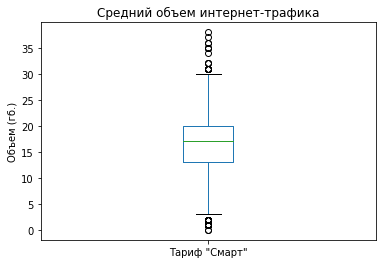

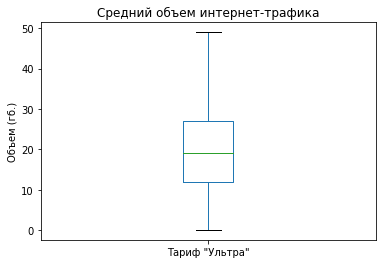

In [55]:
df_pivot_users.query('tariff == "smart"')['gb_used_sum'].plot(kind='box', label='Тариф "Смарт"')
plt.title('Средний объем интернет-трафика')
plt.ylabel('Объем (гб.)')
plt.show()

df_pivot_users.query('tariff == "ultra"')['gb_used_sum'].plot(kind='box', label='Тариф "Ультра"')
plt.title('Средний объем интернет-трафика')
plt.ylabel('Объем (гб.)')
plt.show()

**Вывод**

Средний объем потраченного интернет-трафика у пользователей тарифа "Ультра" выше, чем у пользователей тарифа "Смарт"

**Стандартное отклонение объема интернет-трафика**

In [56]:
print('Стандартное отклонение объема интернет-трафика пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['gb_used_sum'].std()))
print('Стандартное отклонение объема интернет-трафика пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['gb_used_sum'].std()))

Стандартное отклонение объема интернет-трафика пользователей тарифа "Ультра" в месяц: 9.85
Стандартное отклонение объема интернет-трафика пользователей тарифа "Смарт" в месяц: 5.75


**Вывод**

Стандартное отклонение для пользователей тарифа "Ультра" выше, чем для пользователей тарифа "Смарт". Значит, количество интернет-трафика, которое используют пользователи тарифа "Ультра", имеет менее стабильное значение и может сильно отличаться в каждом месяце от предыдущего. 

**Дисперсия объема интернет-трафика**

In [57]:
print('Дисперсия объема интернет-трафика пользователей тарифа "Ультра" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "ultra"')['gb_used_sum'].var()))
print('Дисперсия объема интернет-трафика пользователей тарифа "Смарт" в месяц: {:.2f}'
      .format(df_pivot_users.query('tariff == "smart"')['gb_used_sum'].var()))

Дисперсия объема интернет-трафика пользователей тарифа "Ультра" в месяц: 97.09
Дисперсия объема интернет-трафика пользователей тарифа "Смарт" в месяц: 33.03


**Вывод**

Дисперсия длительности звонков для пользователей тарифа "Ультра" в несколько раз больше, чем для пользователей тарифа "Смарт".

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>

Успех: Базовые статистические параметры получены. Приведены все необходимые графики. Здорово, что графики для одинаковых услуг тарифов приведены на одном рисунке. Так удобнее сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 
    
Графики по среднему отклонению и дисперсии не нужны. Достаточно просто сравнения данных показателей для разных тарифов. 

</div>

# Проверка гипотез

Требуется проверить следующие гипотезы:

* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для этого проведем дополнительные расчеты.

## Подготовка массива данных для дальнейшего исследования

In [58]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [59]:
df_pivot_users.head(15)

,user_id,month,calls_count,duration_sum,messages_count,mb_used_sum,gb_used_sum,tariff,city,month_revenue
0,1000,5.0,17.0,159.0,22.0,2253.49,3.0,ultra,Краснодар,1950.0
1,1000,6.0,28.0,172.0,60.0,23233.77,23.0,ultra,Краснодар,1950.0
2,1000,7.0,41.0,340.0,75.0,14003.64,14.0,ultra,Краснодар,1950.0
3,1000,8.0,42.0,408.0,81.0,14055.93,14.0,ultra,Краснодар,1950.0
4,1000,9.0,46.0,466.0,57.0,14568.91,15.0,ultra,Краснодар,1950.0
5,1000,10.0,44.0,350.0,73.0,14702.49,15.0,ultra,Краснодар,1950.0
6,1000,11.0,37.0,338.0,58.0,14756.47,15.0,ultra,Краснодар,1950.0
7,1000,12.0,38.0,333.0,70.0,9817.61,10.0,ultra,Краснодар,1950.0
8,1001,11.0,45.0,430.0,0.0,18429.34,18.0,smart,Москва,1150.0
9,1001,12.0,47.0,414.0,0.0,14036.66,14.0,smart,Москва,550.0


In [60]:
df_pivot_users.query('tariff == "ultra"')['month_revenue']

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3204    1950.0
3205    1950.0
3206    1950.0
3207    1950.0
3208    1950.0
Name: month_revenue, Length: 985, dtype: float64

In [61]:
df_pivot_users.query('tariff == "smart"')['month_revenue']

8       1150.0
9        550.0
10       550.0
11      1150.0
12      1550.0
         ...  
3209     550.0
3210     950.0
3211    1550.0
3212    1150.0
3213     950.0
Name: month_revenue, Length: 2229, dtype: float64

## Проверка гипотез

**Проверим следующую гипотезу:**
* Средняя ежемесячная выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Пусть нулевая гипотеза H0 - Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.

Альтернативная гипотеза H1 - Средняя выручка пользователей тарифов "Ультра" и "Смарт" **не** равна.

Решим вопрос о принятии или отвержении нулевой гипотезы по p-value.

In [62]:
sample_ultra = df_pivot_users.query('tariff == "ultra"')['month_revenue']
sample_smart = df_pivot_users.query('tariff == "smart"')['month_revenue']

print('Дисперсия выборки пользователей тарифа Смарт:', sample_smart.var(ddof=1))
print('Дисперсия выборки пользователей тарифа Ультра:', sample_ultra.var(ddof=1))

alpha = 0.05
results = st.ttest_ind(sample_ultra, sample_smart, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Принимаем нулевую гипотезу')

Дисперсия выборки пользователей тарифа Смарт: 669785.7080064242
Дисперсия выборки пользователей тарифа Ультра: 141516.74507861826
p-значение: 4.2606313931076085e-250
Принимаем альтернативную гипотезу


Так как p-значение мало, то есть основание отвергнуть нулевую гипотезу о том, что средние выручки тарифов равны.

**Вывод:**

Средняя ежемесячная выручка пользователей тарифов «Ультра» и «Смарт» не равна.

**Проверим следующую гипотезу:**

* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пусть нулевая гипотеза H0 - Средняя выручка пользователей из Москвы **не** отличается от выручки пользователей из других регионов, т.е. выручка равна.

Альтернативная гипотеза H1 - Средняя выручка пользователей пользователей из Москвы отличается от выручки пользователей из других регионов.

Решим вопрос о принятии или отвержении нулевой гипотезы по p-value.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Формулировки гипотез верны. 
</div>

In [63]:
sample_moscow = df_pivot_users.query('city == "Москва"')['month_revenue']
sample_regions = df_pivot_users.query('city != "Москва"')['month_revenue']

print('Дисперсия выборки пользователей из Москвы:', sample_moscow.var(ddof=1))
print('Дисперсия выборки пользователей из регионов:', sample_regions.var(ddof=1))

alpha = 0.05
results = st.ttest_ind(sample_moscow, sample_regions, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Принимаем нулевую гипотезу')

Дисперсия выборки пользователей из Москвы: 565636.467011886
Дисперсия выборки пользователей из регионов: 654137.6285218114
p-значение: 0.5257376663729298
Принимаем нулевую гипотезу


Так как р-значение велико, и говорит о том, что с вероятностью 52% различие можно получить случайно, то можем принять нулевую гипотезу. 

**Вывод:**

Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

# Общий вывод

Для пользователей тарифов "Ультра" и "Смарт" характерно различное поведение. 

Пользователи тарифа "Ультра" редко тратят одинаковое количество услуг, разброс этих значений у них намного больше, чем у пользователей тарифа "Смарт". 

Исходя из статистических тестов можно принять следующие гипотезы:

* Средняя ежемесячная выручка пользователей тарифов «Ультра» и «Смарт» не равна.
* Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Так же клиенты тарифа "Смарт" больше склонны к трате усредненного количества трафика, сообщений и минут звонков. Так же у тарифа "Смарт" суммарная ежемесячная выручка и максимальное значение прибыли выше, чем у тарифа "Ультра". Таким образом, можно прийти к тому, что для телеком-компании наиболее перспективным тарифом будет тариф "Смарт".

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить и методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Рекомендую ресурс https://www.python-graph-gallery.com/. В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.

Ты проделала большую работу, молодец!

</div>